## Practicing Simple and Multiple Polynomial Regression On FuelConsumptionCo2 Dataset

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
from sklearn.metrics import r2_score

### Define Dataset

In [38]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv"
response = requests.get(url)

with open("FuelConsumptionCo2.csv", "wb") as fout:
    fout.write(response.content)

df = pd.read_csv("FuelConsumptionCo2.csv")
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


### Prepeocessing

In [40]:
cdf = df[["VEHICLECLASS", "ENGINESIZE", "CYLINDERS", "FUELCONSUMPTION_COMB", "CO2EMISSIONS"]]

cdf.describe()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
count,1067.000000,1067.000000,1067.000000,1067.000000
mean,3.346298,5.794752,11.580881,256.228679
std,1.415895,1.797447,3.485595,63.372304
min,1.000000,3.000000,4.700000,108.000000
25%,2.000000,4.000000,9.000000,207.000000
50%,3.400000,6.000000,10.900000,251.000000
75%,4.300000,8.000000,13.350000,294.000000
max,8.400000,12.000000,25.800000,488.000000


In [41]:
cdf = cdf.copy()

mean_co2emission = cdf.groupby("VEHICLECLASS")["CO2EMISSIONS"].mean()
cdf["VEHICLECLASS_encoded"] = cdf["VEHICLECLASS"].map(mean_co2emission)

cdf.drop("VEHICLECLASS", axis=1, inplace=True)
cdf.head(3)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS,VEHICLECLASS_encoded
0,2.0,4,8.5,196,216.715116
1,2.4,4,9.6,221,216.715116
2,1.5,4,5.9,136,216.715116


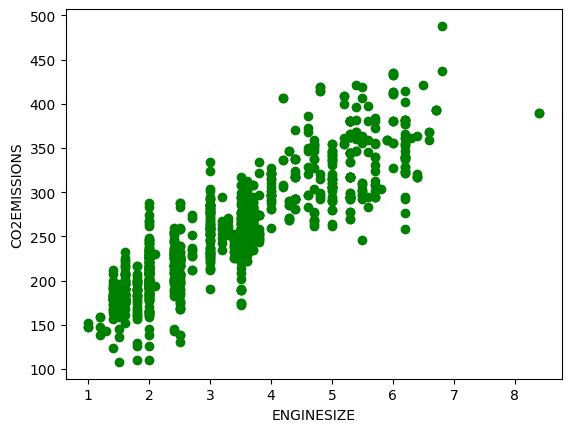

In [44]:
plt.scatter(cdf["ENGINESIZE"], cdf["CO2EMISSIONS"], color="green", label="ENGINESIZE")
plt.xlabel("ENGINESIZE")
plt.ylabel("CO2EMISSIONS")
plt.show()

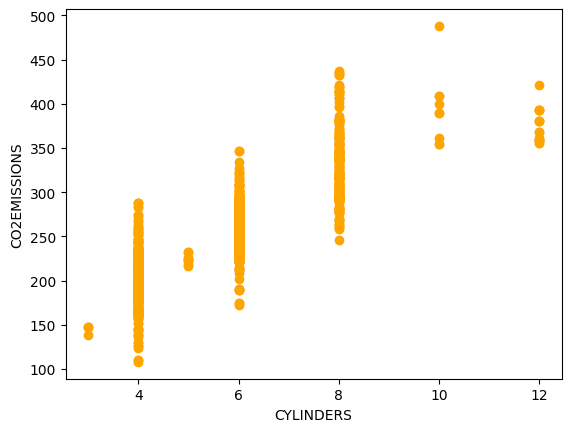

In [45]:
plt.scatter(cdf["CYLINDERS"], cdf["CO2EMISSIONS"], color="orange")
plt.xlabel("CYLINDERS")
plt.ylabel("CO2EMISSIONS")
plt.show()

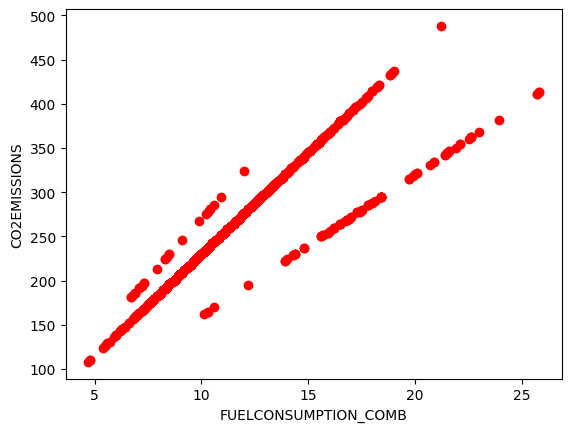

In [46]:
plt.scatter(cdf["FUELCONSUMPTION_COMB"], cdf["CO2EMISSIONS"], color="red")
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("CO2EMISSIONS")
plt.show()

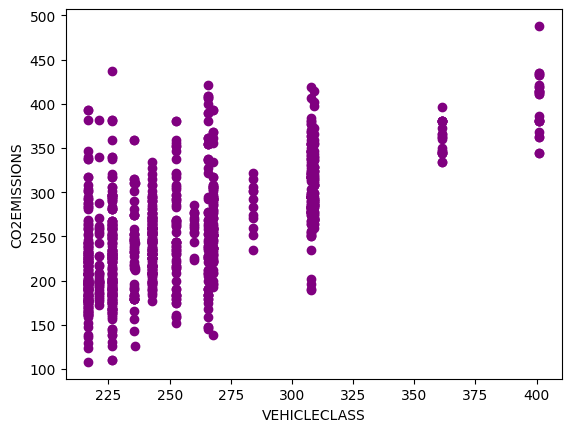

In [47]:
plt.scatter(cdf["VEHICLECLASS_encoded"], cdf["CO2EMISSIONS"], color="purple")
plt.xlabel("VEHICLECLASS")
plt.ylabel("CO2EMISSIONS")
plt.show()

In [48]:
msk = np.random.rand(len(df)) < 0.8

train, test = cdf[msk], cdf[~msk]

train.shape, test.shape

((869, 5), (198, 5))

In [49]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

### On ENGINESIZE Feature
#### Preprocessing

In [50]:
x_train = np.asanyarray(train[["ENGINESIZE"]])
y_train = np.asanyarray(train[["CO2EMISSIONS"]])

x_test = np.asanyarray(test[["ENGINESIZE"]])
y_test = np.asanyarray(test[["CO2EMISSIONS"]])

In [51]:
poly = PolynomialFeatures(degree=2)
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test)

### Model Definition

In [52]:
mymodel = LinearRegression()
mymodel.fit(x_train_poly, y_train)

print(f"intercept : {mymodel.intercept_[0]} | coefficient : {mymodel.coef_[0][0]}, coefficient : {mymodel.coef_[0][1]}, coefficient : {mymodel.coef_[0][2]}")

intercept : 104.9306100340537 | coefficient : 0.0, coefficient : 52.29699980405308, coefficient : -1.7823745183615571


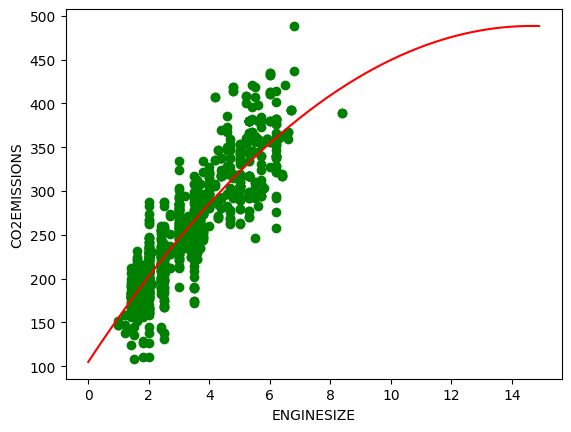

In [53]:
plt.scatter(cdf["ENGINESIZE"], cdf["CO2EMISSIONS"], color="green")
x = np.arange(0, 15, 0.1)
y = mymodel.intercept_[0] + mymodel.coef_[0][1] * x + mymodel.coef_[0][2] * np.pow(x, 2)
plt.plot(x, y, color="red")
plt.xlabel("ENGINESIZE")
plt.ylabel("CO2EMISSIONS")
plt.show()

### Model Evaluation

In [54]:
y_test_pred = mymodel.predict(x_test_poly)

mse = np.mean((y_test - y_test_pred) ** 2)
mae = np.mean(np.absolute(y_test - y_test_pred))
r2 = r2_score(y_test, y_test_pred)

print(f"mean squared error : {mse:.5f} | mean absolute error : {mae:.5f} | r2 score : {r2:.5f}".title().title())

Mean Squared Error : 914.52794 | Mean Absolute Error : 22.57747 | R2 Score : 0.76519


### On CYLINDERS Feature

### Preprocessing

In [55]:
x_train = np.asanyarray(train[["CYLINDERS"]])
y_train = np.asanyarray(train[["CO2EMISSIONS"]])

x_test = np.asanyarray(test[["CYLINDERS"]])
y_test = np.asanyarray(test[["CO2EMISSIONS"]])

In [56]:
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test)

In [57]:
model = LinearRegression()
model.fit(x_train_poly, y_train)

print(f"intercept : {model.intercept_[0]} | coefficient : {model.coef_[0][0]}, coefficient : {model.coef_[0][1]}, coefficient : {model.coef_[0][2]}")

intercept : 17.999126437768183 | coefficient : 0.0, coefficient : 51.86864174688103, coefficient : -1.683662246152366


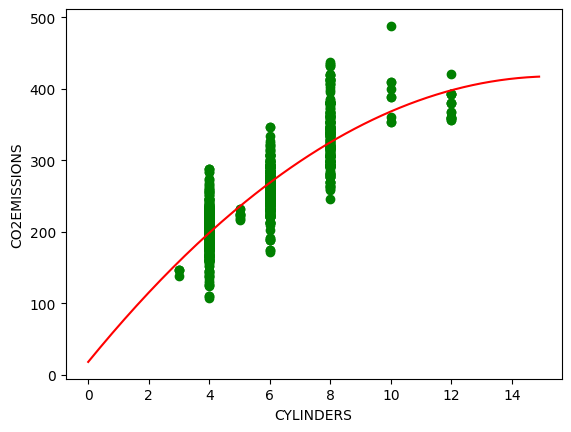

In [58]:
plt.scatter(cdf["CYLINDERS"], cdf["CO2EMISSIONS"], color="green")
x = np.arange(0, 15, 0.1)
y = model.intercept_[0] + model.coef_[0][1] * x + model.coef_[0][2] * np.pow(x, 2)
plt.plot(x, y, color="red")
plt.xlabel("CYLINDERS")
plt.ylabel("CO2EMISSIONS")
plt.show()

### Model Evaluation

In [59]:
y_pred = model.predict(x_test_poly)

mse = np.mean((y_test - y_pred) ** 2)
mae = np.mean(np.absolute(y_test - y_pred))
r2 = r2_score(y_test, y_pred)

print(f"mean squared error : {mse:.5f} | mean absolute error : {mae:.5f} | r2 score : {r2:.5f}".title())

Mean Squared Error : 1079.45675 | Mean Absolute Error : 24.83804 | R2 Score : 0.72284


### ON ENGINESIZE And FUELCONSUMPTION_COMB Features.

### Preprocessing

In [60]:
x_train = np.asanyarray(train[["ENGINESIZE", "FUELCONSUMPTION_COMB"]])
y_train = np.asanyarray(train[["CO2EMISSIONS"]])

x_test = np.asanyarray(test[["ENGINESIZE", "FUELCONSUMPTION_COMB"]])
y_test = np.asanyarray(test[["CO2EMISSIONS"]])

In [61]:
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test)

### Model Definition

In [62]:
mymodel = LinearRegression()
mymodel.fit(x_train_poly, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


### Model Evaluation

In [63]:
y_pred = mymodel.predict(x_test_poly)

mse = np.mean((y_test - y_pred) ** 2)
mae = np.mean(np.absolute(y_test - y_pred))
r2 = r2_score(y_test, y_pred)

print(f"mean squared error : {mse:.5f} | mean absolute error : {mae:.5f} | r2 score : {r2:.5f}".title())

Mean Squared Error : 360.54548 | Mean Absolute Error : 11.19628 | R2 Score : 0.90743


### On VEHICLECLASS Feature
#### Preprocessing

In [64]:
x_train = np.asanyarray(train[["VEHICLECLASS_encoded"]])
y_train = np.asanyarray(train[["CO2EMISSIONS"]])

x_test = np.asanyarray(test[["VEHICLECLASS_encoded"]])
y_test = np.asanyarray(test[["CO2EMISSIONS"]])

In [65]:
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test)

### Model Definition

In [71]:
mymodel = LinearRegression()
mymodel.fit(x_train_poly, y_train)

print(f"intercept : {mymodel.intercept_[0]} | coefficient : {mymodel.coef_[0][0]} | {mymodel.coef_[0][1]} | {mymodel.coef_[0][2]}".title())

Intercept : -24.761745507524324 | Coefficient : 0.0 | 1.178367572417028 | -0.00031472564346479714


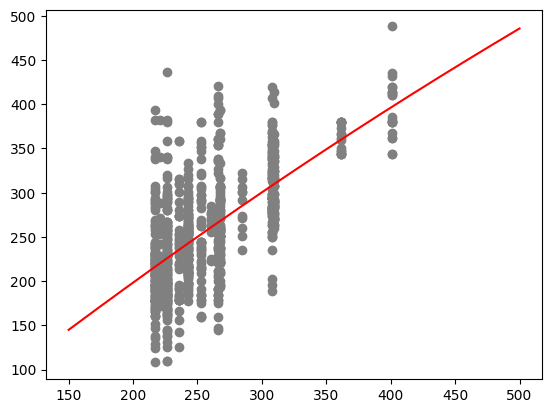

In [72]:
plt.scatter(x_train, y_train, color="gray")

x = np.linspace(150, 500, 1000)
y = mymodel.intercept_[0] + mymodel.coef_[0][1] * x + mymodel.coef_[0][2] * np.pow(x, 2)

plt.plot(x, y, color="red")
plt.show()

In [74]:
y_pred = mymodel.predict(x_test_poly)

mse = np.mean((y_test - y_pred) ** 2)
mae = np.mean(np.absolute(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"mean squared error : {mse:.5f} | mean absolute erro : {mae:.5f} | r2 score : {r2:.5f}".title())

Mean Squared Error : 2235.46506 | Mean Absolute Erro : 254.75758 | R2 Score : 1.00000
